<a href="https://colab.research.google.com/github/lucasbejarano/Covid19/blob/main/covid19_vacunacion_arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

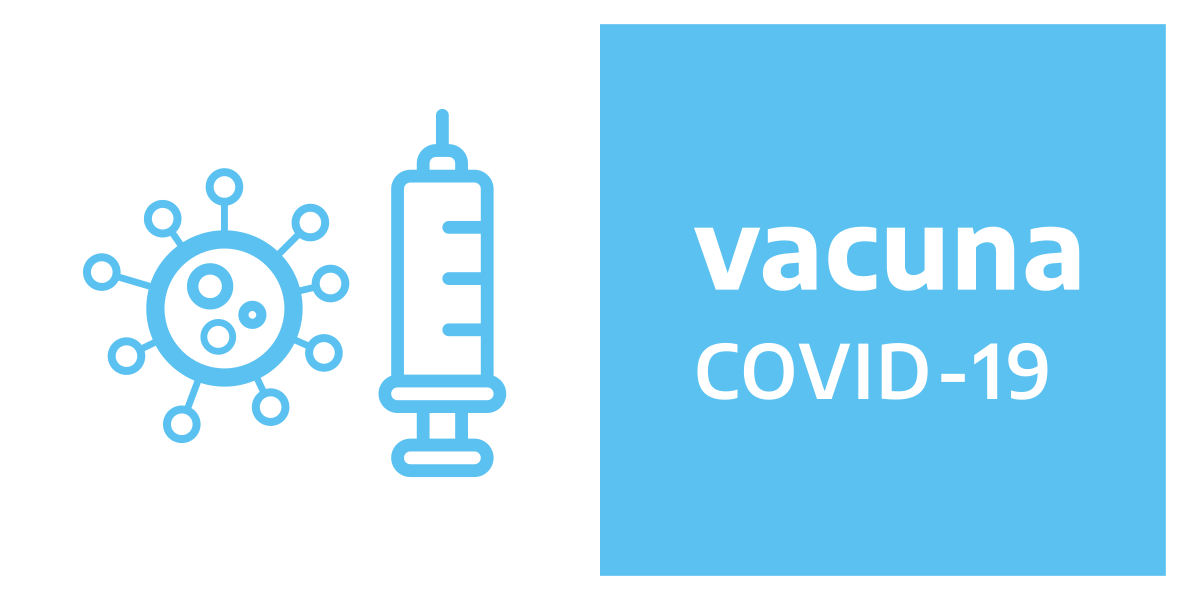

#Análisis de vacunacion COVID19 - Argentina 2021

###Autor: Lucas Bejarano 
###linkedin: 
###Github:

# Import Librerias

In [1]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.8MB/s 


In [2]:
#Import's de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools

#Análisis de vacunación por sexo

##Analisis sobre total país

In [76]:
file='https://raw.githubusercontent.com/lucasbejarano/Covid19/main/Data/covid_test.csv'
data = pd.read_csv('https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip')

data.head()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Buenos Aires,6,Lomas de Zamora,490,2021-05-07,Sputnik,>60,1,I-460321
1,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Entre Ríos,30,Concordia,15,2021-05-05,Sputnik,>60,1,I-490421
2,F,40-49,CABA,2,COMUNA 1,1,CABA,2,COMUNA 4,4,2021-03-13,Sinopharm,Estratégico,1,2021010043
3,M,60-69,Buenos Aires,6,Quilmes,658,Buenos Aires,6,Quilmes,658,2021-04-20,Sputnik,>60,1,I-340321
4,M,40-49,Buenos Aires,6,Berazategui,91,Buenos Aires,6,Berazategui,91,2021-01-07,Sputnik,Salud,1,486081120R


In [77]:
data['sexo'].unique() #Valores de sexo

array(['M', 'F', 'S.I.'], dtype=object)

In [78]:
data['orden_dosis'].unique() #Valores de dosis

array([1, 2])

In [79]:
dosis1 = data.query(' orden_dosis == 1') #filtro para primera dosis
dosis1

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Buenos Aires,6,Lomas de Zamora,490,2021-05-07,Sputnik,>60,1,I-460321
1,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Entre Ríos,30,Concordia,15,2021-05-05,Sputnik,>60,1,I-490421
2,F,40-49,CABA,2,COMUNA 1,1,CABA,2,COMUNA 4,4,2021-03-13,Sinopharm,Estratégico,1,2021010043
3,M,60-69,Buenos Aires,6,Quilmes,658,Buenos Aires,6,Quilmes,658,2021-04-20,Sputnik,>60,1,I-340321
4,M,40-49,Buenos Aires,6,Berazategui,91,Buenos Aires,6,Berazategui,91,2021-01-07,Sputnik,Salud,1,486081120R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002825,F,60-69,Entre Ríos,30,Concordia,15,Entre Ríos,30,Concordia,15,2021-04-08,Sinopharm,>60,1,2021030202
10002826,M,80-89,Buenos Aires,6,Bragado,112,Buenos Aires,6,Bragado,112,2021-04-09,Sinopharm,>60,1,2021030209
10002827,F,18-29,Buenos Aires,6,La Matanza,427,Buenos Aires,6,La Matanza,427,2021-04-08,Sputnik,Salud,1,I-031220
10002828,F,70-79,Buenos Aires,6,La Plata,441,Buenos Aires,6,La Plata,441,2021-04-07,Sputnik,>60,1,I-70221


In [80]:
dosis2 = data.query(' orden_dosis == 2') #filtro para segunda dosis
dosis2

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
5,M,40-49,Buenos Aires,6,Berazategui,91,Buenos Aires,6,Berazategui,91,2021-02-01,Sputnik,Salud,2,ZB01820
15,F,70-79,Buenos Aires,6,Puán,651,Buenos Aires,6,Puán,651,2021-03-12,Sputnik,>60,2,II-100221
18,S.I.,70-79,Jujuy,38,Dr. Manuel Belgrano,21,Jujuy,38,Dr. Manuel Belgrano,21,2021-04-14,Sputnik,>60,2,II-60121
31,F,60-69,Neuquén,58,Confluencia,35,Neuquén,58,Confluencia,35,2021-05-10,Sinopharm,>60,2,2021040419
37,M,50-59,Misiones,54,Montecarlo,84,Misiones,54,Montecarlo,84,2021-01-25,Sputnik,Salud,2,ZB01720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002678,M,50-59,Chaco,22,1º de Mayo,126,Chaco,22,1º de Mayo,126,2021-04-13,Sinopharm,Salud,2,2021030203
10002699,M,50-59,CABA,2,COMUNA 1,1,CABA,2,COMUNA 5,5,2021-04-09,Sputnik,Salud,2,II-080221
10002765,M,30-39,San Juan,70,Rawson,77,San Juan,70,Pocito,70,2021-04-08,Sputnik,Salud,2,II-090221
10002769,M,70-79,Neuquén,58,Confluencia,35,Neuquén,58,Confluencia,35,2021-04-09,Sputnik,>60,2,II-80121


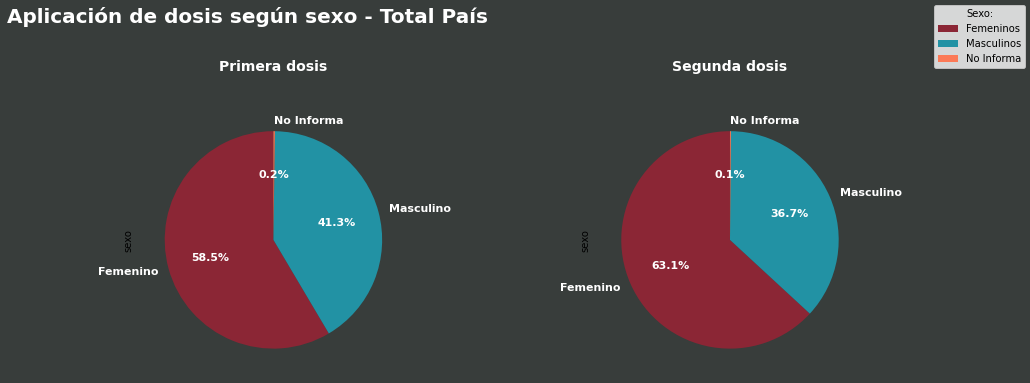

In [81]:
#Análisis gráfico de vacunas aplicadas Covid19 según dosis para el total del pais

#Gráfico con Matplotlib

fig, ax = plt.subplots(1,2, figsize = ( 15 , 5 ), subplot_kw=dict(aspect="equal"))

fig.suptitle('Aplicación de dosis según sexo - Total País', fontsize=20, color='w', weight='bold', y=1.15, ha='right')
labels=['Femenino','Masculino','No Informa']
colors=['#8B2635','#2292A4','#FC7A57']

data2 = dosis2['sexo'].value_counts()
pie1= dosis1['sexo'].value_counts().plot.pie(ax=ax[0],labels=labels, colors=colors,autopct='%1.1f%%', startangle=90, textprops=dict(color="w",fontsize=11, weight='bold'))
pie2 = dosis2['sexo'].value_counts().plot.pie(ax=ax[1],labels=labels, colors=colors,autopct='%1.1f%%', startangle=90,textprops=dict(color="w",fontsize=11, weight='bold'))
pie1.set_title("Primera dosis", color="w", y=1.1, fontweight='bold', fontsize=14)
pie2.set_title("Segunda dosis", color="w", y=1.1, fontweight='bold', fontsize=14)


#Change background to ax and fig
fig.patch.set_facecolor('#383D3B')

fig.legend(['Femeninos','Masculinos','No Informa'], title='Sexo:', loc="upper right")

In [82]:
#Grafico con Plotly

labels=['Femenino','Masculino','No Informa']
colors=['#8B2635','#2292A4','#AF9164']

sex_1_dosis = go.Pie(labels=labels, values=dosis1['sexo'].value_counts(), marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Primera dosis', textinfo='label+percent', title="Primera Dosis")

sex_2_dosis = go.Pie(labels=labels, values=dosis2['sexo'].value_counts(), marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [.6, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='segunda dosis', textinfo='label+percent',title='Segunda Dosis')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Aplicación de dosis según sexo - Total País')

fig = go.Figure(data = [sex_1_dosis,sex_2_dosis ], layout = layout)



fig.show()

In [83]:
#Grafico Plotly v2

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=['Primera Dosis', 'Segunda Dosis'])


labels=['Femenino','Masculino','No Informa']
colors=['#8B2635','#2292A4','#AF9164']

fig.add_trace(go.Pie(
     values=dosis1['sexo'].value_counts(),
     scalegroup='one',
     labels=labels,
     domain=dict(x=[0, 0.5]),
     name="Primera dosis"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=dosis2['sexo'].value_counts(),
     scalegroup='two',
     labels=labels,
     domain=dict(x=[0.5, 1.0]),
     name="Segunda dosis"),
    row=1, col=2)

fig.update_layout(title_text='Aplicación de dosis según sexo - Total País')

fig.show()

##Análisis por provincia



In [84]:
data_prov = data[['sexo','orden_dosis','jurisdiccion_aplicacion','jurisdiccion_aplicacion_id']]
data_prov

,sexo,orden_dosis,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id
0,M,1,Buenos Aires,6
1,M,1,Entre Ríos,30
2,F,1,CABA,2
3,M,1,Buenos Aires,6
4,M,1,Buenos Aires,6
...,...,...,...,...
10002825,F,1,Entre Ríos,30
10002826,M,1,Buenos Aires,6
10002827,F,1,Buenos Aires,6
10002828,F,1,Buenos Aires,6


In [85]:
#Filtro para vacunados Femeninos con 1 y 2 dosis
data_prov_f = data_prov.query(' sexo == "F" ')
valores_f = data_prov_f['jurisdiccion_aplicacion'].value_counts()
valores_f

Buenos Aires           2265398
CABA                    615462
Córdoba                 504129
Santa Fe                496716
Mendoza                 236923
Tucumán                 193816
Entre Ríos              165166
Salta                   151719
Chaco                   139103
Corrientes              123004
Misiones                116191
Río Negro               106676
San Juan                104160
Santiago del Estero     100865
Neuquén                  94592
Jujuy                    83713
San Luis                 79378
Chubut                   73335
Formosa                  61319
La Pampa                 60843
La Rioja                 55650
Catamarca                51333
Santa Cruz               40898
Tierra del Fuego         22575
Name: jurisdiccion_aplicacion, dtype: int64

In [86]:
#Filtro para vacunados Masculinos con 1 y 2 dosis
data_prov_m = data_prov.query('sexo == "M" ')
valores_m = data_prov_m['jurisdiccion_aplicacion'].value_counts()
valores_m

Buenos Aires           1526653
CABA                    350146
Córdoba                 337502
Santa Fe                284254
Mendoza                 168754
Tucumán                 151702
Entre Ríos              118564
Salta                   113817
Chaco                   100688
Corrientes               93396
Misiones                 89847
Río Negro                77411
Santiago del Estero      74699
San Juan                 70069
Neuquén                  69855
Jujuy                    62621
San Luis                 60839
Chubut                   57312
Formosa                  52624
La Rioja                 43769
La Pampa                 42477
Catamarca                39480
Santa Cruz               34525
Tierra del Fuego         19130
Name: jurisdiccion_aplicacion, dtype: int64

In [87]:
import plotly.express as px
#fig = px.bar(data_prov_f1, x="valores", y="jurisdiccion_aplicacion", orientation='h')
fig = px.bar(y=valores_f.index, x=valores_f, orientation='h')
fig.show()

In [88]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Femeninos",
            x=valores_f,
            y=valores_f.index,
            marker_color='rgb(55, 83, 109)',
            orientation='h',
            offsetgroup=0,
        ),
        go.Bar(
            name="Masculinos",
            x=valores_m,
            y=valores_m.index,
            marker_color='rgb(26, 118, 255)',
            orientation='h',
            offsetgroup=1,
        ),
    ],
    layout=go.Layout(
        title="Aplicación de vacunas por provincia",
        yaxis_title="Jurisdicción",
        xaxis_title="Cantidad de aplicaciones"
    )
)
#category descending
fig.update_layout(yaxis={'categoryorder':'total ascending'}, autosize=False,
    width=1200,
    height=800,
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

# Análisis de vacunación por rango etario

### Análisis sobre total país

In [89]:
data #dataset original

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Buenos Aires,6,Lomas de Zamora,490,2021-05-07,Sputnik,>60,1,I-460321
1,M,60-69,Buenos Aires,6,Lomas de Zamora,490,Entre Ríos,30,Concordia,15,2021-05-05,Sputnik,>60,1,I-490421
2,F,40-49,CABA,2,COMUNA 1,1,CABA,2,COMUNA 4,4,2021-03-13,Sinopharm,Estratégico,1,2021010043
3,M,60-69,Buenos Aires,6,Quilmes,658,Buenos Aires,6,Quilmes,658,2021-04-20,Sputnik,>60,1,I-340321
4,M,40-49,Buenos Aires,6,Berazategui,91,Buenos Aires,6,Berazategui,91,2021-01-07,Sputnik,Salud,1,486081120R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002825,F,60-69,Entre Ríos,30,Concordia,15,Entre Ríos,30,Concordia,15,2021-04-08,Sinopharm,>60,1,2021030202
10002826,M,80-89,Buenos Aires,6,Bragado,112,Buenos Aires,6,Bragado,112,2021-04-09,Sinopharm,>60,1,2021030209
10002827,F,18-29,Buenos Aires,6,La Matanza,427,Buenos Aires,6,La Matanza,427,2021-04-08,Sputnik,Salud,1,I-031220
10002828,F,70-79,Buenos Aires,6,La Plata,441,Buenos Aires,6,La Plata,441,2021-04-07,Sputnik,>60,1,I-70221


In [90]:
data['grupo_etario'].unique()

array(['60-69', '40-49', '50-59', '70-79', '80-89', '18-29', '30-39',
       '90-99', '>=100', 'S.I.'], dtype=object)

In [91]:
data_ge = data[['grupo_etario','vacuna','orden_dosis']]
data_ge

#En este dataset no voy a usar la columna sexo, solamente voy a discriminar el rango etario segun su dosis
#utilizaré la columna 'vacuna' para hacer el conteo de vacunas aplicadas

,grupo_etario,vacuna,orden_dosis
0,60-69,Sputnik,1
1,60-69,Sputnik,1
2,40-49,Sinopharm,1
3,60-69,Sputnik,1
4,40-49,Sputnik,1
...,...,...,...
10002825,60-69,Sinopharm,1
10002826,80-89,Sinopharm,1
10002827,18-29,Sputnik,1
10002828,70-79,Sputnik,1


In [92]:
grupos = data_ge.groupby(by=['grupo_etario','orden_dosis']).count()
grupos

vacuna
grupo_etario orden_dosis         
18-29        1             288270
             2             130089
30-39        1             586482
             2             307297
40-49        1             719381
             2             360889
50-59        1             890362
             2             305596
60-69        1            2616987
             2             339151
70-79        1            1987697
             2             358071
80-89        1             819972
             2             126289
90-99        1             138684
             2              24252
>=100        1               2458
             2                403
S.I.         1                416
             2                 84

In [93]:
do1 = grupos.query('orden_dosis == 1') #Multiindex orden_dosis y grupo_etario
do1.index = do1.index.get_level_values('grupo_etario') #Utilizo solo un index
do1

,vacuna
grupo_etario,
18-29,288270
30-39,586482
40-49,719381
50-59,890362
60-69,2616987
70-79,1987697
80-89,819972
90-99,138684
>=100,2458


In [94]:
do2 = grupos.query('orden_dosis == 2')
do2.index = do2.index.get_level_values('grupo_etario')
do2

,vacuna
grupo_etario,
18-29,130089
30-39,307297
40-49,360889
50-59,305596
60-69,339151
70-79,358071
80-89,126289
90-99,24252
>=100,403


In [95]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=do1.index,
    y=do1['vacuna'],
    name='Primera Dosis',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=do2.index,
    y=do2['vacuna'],
    name='Segunda Dosis',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45, 
    title='Aplicación de dosis según grupo etario',
    xaxis_title="Grupo etario",
    yaxis_title="Cantidad de aplicaciones")

fig.show()

### Análisis según sexo sobre total país


In [96]:
ge_sexo = data[['grupo_etario','orden_dosis','vacuna','sexo']]
ge_sexo

,grupo_etario,orden_dosis,vacuna,sexo
0,60-69,1,Sputnik,M
1,60-69,1,Sputnik,M
2,40-49,1,Sinopharm,F
3,60-69,1,Sputnik,M
4,40-49,1,Sputnik,M
...,...,...,...,...
10002825,60-69,1,Sinopharm,F
10002826,80-89,1,Sinopharm,M
10002827,18-29,1,Sputnik,F
10002828,70-79,1,Sputnik,F


In [121]:
#elimino valores de sexo sin informar
#ge_sexo = ge_sexo.query('sexo != "S.I." ')
ge_sexo = ge_sexo[ge_sexo.grupo_etario != 'S.I.']
ge_sexo.grupo_etario.unique()

array(['60-69', '40-49', '50-59', '70-79', '80-89', '18-29', '30-39',
       '90-99', '>=100'], dtype=object)

In [122]:
#Genero 4 data slices sobre mi dataset filtrado por sexo, grupo etario, dosis y vacuna (se utilizará como contador)
do_fem1 = ge_sexo.query('sexo == "F" and orden_dosis == 1')
f1 = do_fem1.groupby(by='grupo_etario')['vacuna'].count()
f1


grupo_etario
18-29     177790
30-39     380299
40-49     463314
50-59     523601
60-69    1408910
70-79    1127737
80-89     525121
90-99     101563
>=100       1936
Name: vacuna, dtype: int64

In [123]:
do_fem2 = ge_sexo.query('sexo == "F" and orden_dosis == 2')
f2 = do_fem2.groupby(by='grupo_etario')['vacuna'].count()
f2

grupo_etario
18-29     85554
30-39    208415
40-49    248378
50-59    204967
60-69    186422
70-79    201706
80-89     78897
90-99     17719
>=100       319
Name: vacuna, dtype: int64

In [124]:
do_mas1 = ge_sexo.query('sexo == "M" and orden_dosis == 1')
m1 = do_mas1.groupby(by='grupo_etario')['vacuna'].count()
m1

grupo_etario
18-29     110051
30-39     205089
40-49     254485
50-59     365331
60-69    1203858
70-79     855806
80-89     291919
90-99      36042
>=100        451
Name: vacuna, dtype: int64

In [125]:
do_mas2 = ge_sexo.query('sexo == "M" and orden_dosis == 2')
m2 = do_mas2.groupby(by='grupo_etario')['vacuna'].count()
m2

grupo_etario
18-29     44440
30-39     98504
40-49    112091
50-59    100353
60-69    152217
70-79    155940
80-89     46949
90-99      6354
>=100        77
Name: vacuna, dtype: int64

In [126]:
total_vac = ge_sexo.vacuna.count() #Utilizo cualquier columna que tengo disponible para contar la cantidad total de aplicaciones
total_vac #Total sobre vacunados femeninos y masculinos, no aplica analisis para personas con sexo "sin informar"

9982605

In [127]:
eje_y = do_fem1.grupo_etario.unique()
eje_y
eje_xfem1 = ((100*f1).div(total_vac)).round(2)
eje_xmas1 = ((100*m1).div(total_vac)).round(2) * -1
eje_xfem2 = ((100*f2).div(total_vac)).round(2)
eje_xmas2 = ((100*m2).div(total_vac)).round(2) * -1

eje_y.sort()

In [128]:
#datetime
import datetime as dt
now = dt.datetime.now()
fecha = now.strftime("%d/%m/%y %H:%M")

In [129]:
import plotly.graph_objects as gp

# Creating instance of the figure
fig = gp.Figure()

#Configuración de los graficos
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Masculinos', 'Femeninos'],
                    shared_yaxes=True, 
                    horizontal_spacing = 0.003
                    )

# Agregamos la data al gráfico de 1 dosis para mujeres
fig.add_trace(gp.Bar(y= eje_y, x = eje_xfem1, 
                     name = '1ra Dosis', 
                     hoverinfo='x',
                     marker_color='#8B2635',
                     orientation = 'h')                    
                     )
# Agregamos la data al gráfico de 2 dosis para mujeres
fig.add_trace(gp.Bar(y= eje_y, x = eje_xfem2, 
                     name = '2da Dosis', 
                     hoverinfo='x',
                     marker_color='#E9AFA3',
                     orientation = 'h')              
                     )

# Agregamos la data al gráfico de 1 dosis para varones
fig.add_trace(gp.Bar(y = eje_y, x = eje_xmas1,
                     name = '1ra Dosis', 
                     text=-1 * eje_xmas1.astype('float'),
                     hoverinfo='text',
                     marker_color='#1D3557',
                     orientation = 'h')
                     )
# Agregamos la data al gráfico de 2 dosis para varones
fig.add_trace(gp.Bar(y = eje_y, x = eje_xmas2,
                     name = '2da Dosis', 
                     text=-1 * eje_xmas2.astype('float'),
                     hoverinfo='text',
                     #showlegend=False, **Desactiva etiqueta**
                     marker_color='#2292A4',
                     orientation = 'h')
                     )

# Updating the layout for our graph
layout = fig.update_layout(title= f' Vacunación COVID19 por grupo etario y sexo - Argentina <br>Última Actualización : {fecha}<br>',
                            yaxis=go.layout.YAxis(title='Grupo Etario'),
                            xaxis=go.layout.XAxis(
                                #range=[-1200, 1200],
                                tickvals=[-20, -15, -10, -5, 0, 5, 10, 15, 20],
                                ticktext=["20%", "15%", "10%","5%", 0, "5%", "10%", "15%","20%"],
                                title='% Vacunados'),
                            barmode='overlay',
                            bargap=0.1)
fig.show()